<img src='img/fastcamp_h.png'>

# 7강. Convolutional Neural Network(CNN) Basic

# 더욱 어려운 문제

* 딥러닝의 파급을 막던 여러가지 문제가 해결 된 뒤,
* 연구자들은 점점 어려운 문제를 더욱 깊은 모델로 해결하게 됨
* 그중 가장 먼저 대상이 된것은 이미지 인식 분야였음

# 이미지 인식 (Image classification)이란?

* 주어진 사진에 미리 tagging된 객체들이 등장했는지를 학습하여 평가하는 문제
* 과거의 경우 객체의 특징을 vector로 변환하는 기준을 domain-knowledge가 풍부한 전문가에게 맡기는 수밖에 없었음
* 딥러닝은 vector embedding 자체를 모델 스스로 만들어내기 때문에 domain-knowledge가 적어짐

<img src='img/07_02.png'>

# Mnist 데이터베이스

* 미국 국립표준기술연구소(Modified National Institute of Standards and Technology)에서 수집한 손으로 쓴 숫자 데이터
* 6만개의 학습용 이미지, 1만개의 테스트용 이미지로 구성
    * 0~9까지의 숫자로 구성
    * 가로 24 pixel, 세로 24 pixel의 사진
* 이미지 인식의 성능을 측정하는 표준 데이터베이스

<img src='img/07_03.png'>

# 이미지의 표현 형태

* 이미지는 width길이의 1차원 vector가 height만큼 쌓아져 있는 matrix의 일종
* 흑백사진의 경우 값이 255이면 white, black은 0, 회색은 둘의 사이값이라고 가정할 때, 숫자 1은 다음과 같이 표현 가능

<img src='img/07_04.png' height=50% width=50%>

# X 데이터와 Y데이터의 구성

<img src='img/07_05.png' height=50% width=50%>
<img src='img/07_06.png' height=50% width=50%>

In [34]:
#mnist 데이터셋을 사용하기 위한 import
from keras.datasets import mnist

#mnist 데이터를 세팅함
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


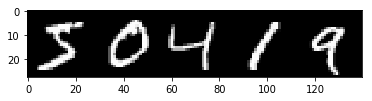

[[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
   25   0   0   0   0   0   0   0   0   0]]
[5 0 4 1 9]


In [13]:
import matplotlib.pylab as plt
import numpy as np
plt.imshow(np.hstack(x_train[:5,]), cmap='gray')
plt.show()
print(x_train[0,10:15])
print(y_train[:5])

# 기존 방식의 딥러닝 모델로 mnist 문제 풀이

* 고려 사항
    * X는 28x28의 2차원 배열, 모델을 구성하기 위해 1차원으로 변경해줌
    * Y는 scalar 값, 회귀 모델로 구성하여 풀어보자
    * dropout이나 그외의 기술은 적당히 써서 구현해보자

In [35]:
print(x_train.shape, x_test.shape)
#rank 2,3의 모양을 하나로 펴줌
x_train = x_train.reshape((60000, -1))
x_test = x_test.reshape((10000, -1))
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


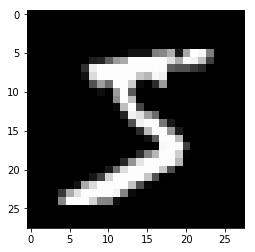

In [4]:
import matplotlib.pylab as plt
import numpy as np
#다시 2차원으로 구성하여 valid한지 확
plt.imshow(x_train[0].reshape((28, 28)) , cmap='gray')
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)  

In [7]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))

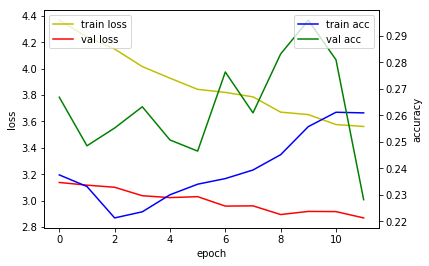

In [8]:
import matplotlib.pylab as plt

def trace(hist):
    fig, loss_ax = plt.subplots(figsize=(6,4))
    #x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용
    acc_ax = loss_ax.twinx()

    #loss 축에 대하여 train과 val 세팅
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    #acc 축에 대하여 train/ val 세
    acc_ax.plot(hist.history['acc'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()
trace(hist)

In [16]:
# x의 범위를 0~1까지로 노말라이즈
x_train = x_train/255.
x_test = x_test/255.

hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))

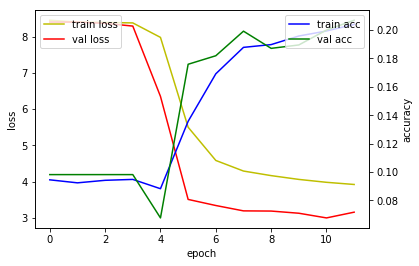

In [17]:
trace(hist)

In [18]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=0, validation_data=(x_test, y_test))

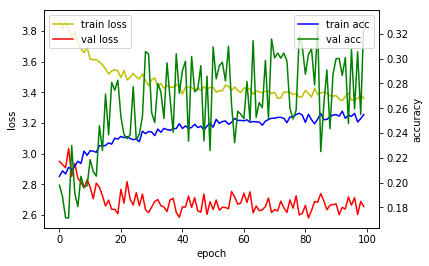

In [21]:
trace(hist)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total para

# 잘되지 않음

* 일반적으로 회귀로 class 값을 예측하는 것은 맞지 않는 행동
* 해당 값이 5인 것을 5.2, 4.9, 4.5 등으로 예측하는 것보다
* 10칸의 vector에서 맞다고 생각하는 칸에 1을 아니라고 생각하는 칸에 0을 넣어주는 것이 더 쉬움
* 즉, y를 scalar값에서 10칸짜리 one-hot encoding으로 바꿔보자

In [36]:
from keras.utils import to_categorical

print(y_train[0], y_test[0])
print(to_categorical(y_train[0], 10), to_categorical(y_test[0], 10))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
pass

5 7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total para

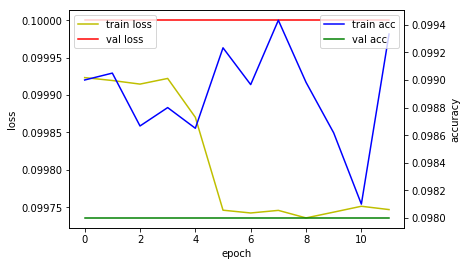

In [39]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))
trace(hist)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total para

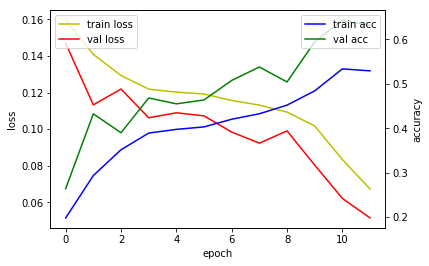

In [40]:
model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))
trace(hist)

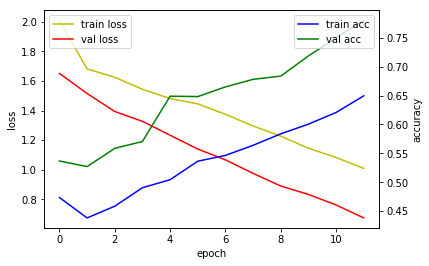

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))
trace(hist)

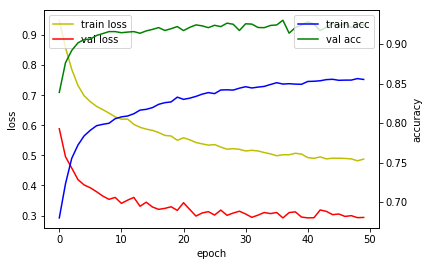

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=0, validation_data=(x_test, y_test))
trace(hist)